In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('online_retail_II.xlsx')

In [3]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
print('Total data points:', df.shape[0])

Total data points: 525461


## Data Cleaning

In [5]:
print(df.isnull().sum())

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64


In [6]:
df.drop(columns=["Description", "Customer ID"], inplace=True)

In [7]:
df.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,Country
0,489434,85048,12,2009-12-01 07:45:00,6.95,United Kingdom
1,489434,79323P,12,2009-12-01 07:45:00,6.75,United Kingdom
2,489434,79323W,12,2009-12-01 07:45:00,6.75,United Kingdom
3,489434,22041,48,2009-12-01 07:45:00,2.10,United Kingdom
4,489434,21232,24,2009-12-01 07:45:00,1.25,United Kingdom


In [8]:
df["Date"] = pd.to_datetime(df["InvoiceDate"]).dt.date
df["Time"] = pd.to_datetime(df["InvoiceDate"]).dt.time

In [9]:
df.drop(columns=["InvoiceDate"], inplace=True)

In [10]:
df.head()

,Invoice,StockCode,Quantity,Price,Country,Date,Time
0,489434,85048,12,6.95,United Kingdom,2009-12-01,07:45:00
1,489434,79323P,12,6.75,United Kingdom,2009-12-01,07:45:00
2,489434,79323W,12,6.75,United Kingdom,2009-12-01,07:45:00
3,489434,22041,48,2.10,United Kingdom,2009-12-01,07:45:00
4,489434,21232,24,1.25,United Kingdom,2009-12-01,07:45:00


## Feature Engineering

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

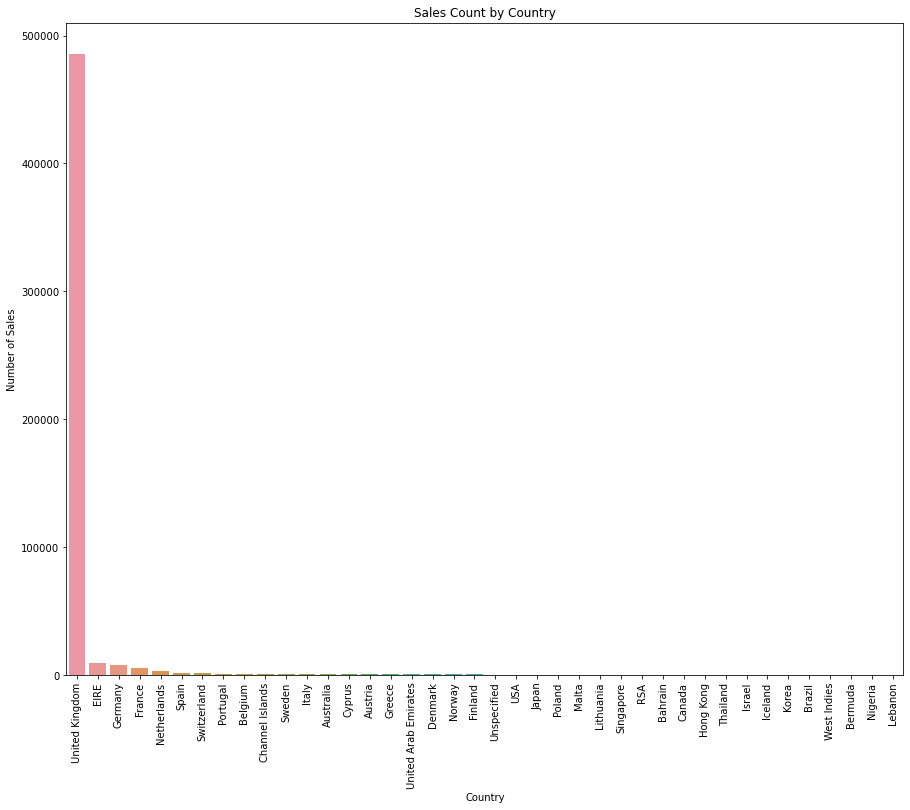

In [12]:
plt.figure(figsize=(15, 12))
sns.countplot(data=df, x='Country', order=df['Country'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Number of Sales')
plt.title('Sales Count by Country')
plt.show()

In [13]:
df['Country'].value_counts()

United Kingdom          485852
EIRE                      9670
Germany                   8129
France                    5772
Netherlands               2769
Spain                     1278
Switzerland               1187
Portugal                  1101
Belgium                   1054
Channel Islands            906
Sweden                     902
Italy                      731
Australia                  654
Cyprus                     554
Austria                    537
Greece                     517
United Arab Emirates       432
Denmark                    428
Norway                     369
Finland                    354
Unspecified                310
USA                        244
Japan                      224
Poland                     194
Malta                      172
Lithuania                  154
Singapore                  117
RSA                        111
Bahrain                    107
Canada                      77
Hong Kong                   76
Thailand                    76
Israel  

### Keeping only the data that belongs to the United Kingdom as it has over 95% of the total data

In [14]:
df = df[df['Country'] == 'United Kingdom']

In [15]:
print('Total data points:', df.shape[0])

Total data points: 485852


In [16]:
df.drop(columns=["Country"], inplace=True)

In [17]:
df.head()

,Invoice,StockCode,Quantity,Price,Date,Time
0,489434,85048,12,6.95,2009-12-01,07:45:00
1,489434,79323P,12,6.75,2009-12-01,07:45:00
2,489434,79323W,12,6.75,2009-12-01,07:45:00
3,489434,22041,48,2.10,2009-12-01,07:45:00
4,489434,21232,24,1.25,2009-12-01,07:45:00


In [18]:
data = df.copy()

In [19]:
data.head()

,Invoice,StockCode,Quantity,Price,Date,Time
0,489434,85048,12,6.95,2009-12-01,07:45:00
1,489434,79323P,12,6.75,2009-12-01,07:45:00
2,489434,79323W,12,6.75,2009-12-01,07:45:00
3,489434,22041,48,2.10,2009-12-01,07:45:00
4,489434,21232,24,1.25,2009-12-01,07:45:00


In [20]:
data['Hour'] = data['Time'].apply(lambda x: x.hour)

In [21]:
data['Sales'] = data['Quantity'] * data['Price']

In [22]:
data['Sales'] = data['Sales'].abs()

In [23]:
data.head()

,Invoice,StockCode,Quantity,Price,Date,Time,Hour,Sales
0,489434,85048,12,6.95,2009-12-01,07:45:00,7,83.4
1,489434,79323P,12,6.75,2009-12-01,07:45:00,7,81.0
2,489434,79323W,12,6.75,2009-12-01,07:45:00,7,81.0
3,489434,22041,48,2.10,2009-12-01,07:45:00,7,100.8
4,489434,21232,24,1.25,2009-12-01,07:45:00,7,30.0


In [24]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

In [25]:
data['year'] = data['Date'].dt.year
data['quarter'] = data['Date'].dt.quarter
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day

In [26]:
data.head()

,Invoice,StockCode,Quantity,Price,Date,Time,Hour,Sales,year,quarter,month,day
0,489434,85048,12,6.95,2009-12-01,07:45:00,7,83.4,2009,4,12,1
1,489434,79323P,12,6.75,2009-12-01,07:45:00,7,81.0,2009,4,12,1
2,489434,79323W,12,6.75,2009-12-01,07:45:00,7,81.0,2009,4,12,1
3,489434,22041,48,2.10,2009-12-01,07:45:00,7,100.8,2009,4,12,1
4,489434,21232,24,1.25,2009-12-01,07:45:00,7,30.0,2009,4,12,1


In [27]:
import calendar
data['month'] = data['month'].apply(lambda x: calendar.month_name[x])

In [28]:
data.head()

,Invoice,StockCode,Quantity,Price,Date,Time,Hour,Sales,year,quarter,month,day
0,489434,85048,12,6.95,2009-12-01,07:45:00,7,83.4,2009,4,December,1
1,489434,79323P,12,6.75,2009-12-01,07:45:00,7,81.0,2009,4,December,1
2,489434,79323W,12,6.75,2009-12-01,07:45:00,7,81.0,2009,4,December,1
3,489434,22041,48,2.10,2009-12-01,07:45:00,7,100.8,2009,4,December,1
4,489434,21232,24,1.25,2009-12-01,07:45:00,7,30.0,2009,4,December,1


In [29]:
data.drop(columns=["Invoice", "StockCode"], inplace=True)

In [30]:
data.head()

,Quantity,Price,Date,Time,Hour,Sales,year,quarter,month,day
0,12,6.95,2009-12-01,07:45:00,7,83.4,2009,4,December,1
1,12,6.75,2009-12-01,07:45:00,7,81.0,2009,4,December,1
2,12,6.75,2009-12-01,07:45:00,7,81.0,2009,4,December,1
3,48,2.10,2009-12-01,07:45:00,7,100.8,2009,4,December,1
4,24,1.25,2009-12-01,07:45:00,7,30.0,2009,4,December,1


## Data Visualization and Analysis

In [31]:
sales_per_hour = data.groupby('Hour')['Sales'].sum()

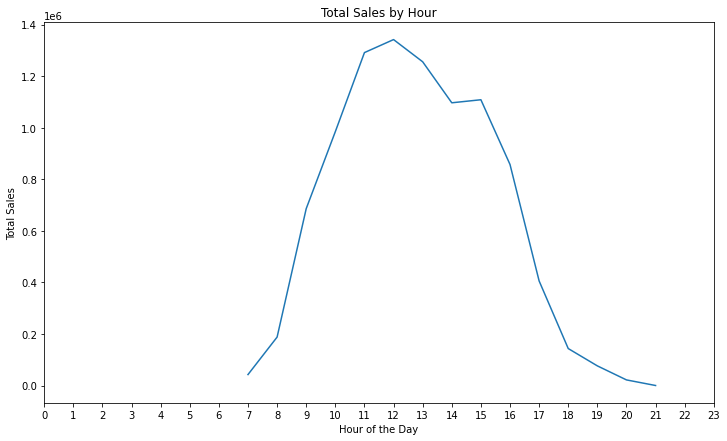

In [32]:
plt.figure(figsize=(12, 7))
plt.plot(sales_per_hour.index, sales_per_hour.values, linestyle='-')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.title('Total Sales by Hour')
plt.xticks(range(0, 24))
plt.show()

In [33]:
sales_by_year = data.groupby('year')['Sales'].sum().reset_index()

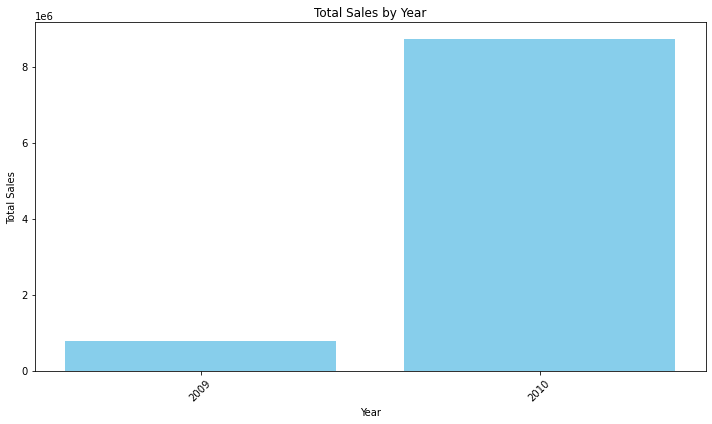

In [34]:
plt.figure(figsize=(10, 6))
plt.bar(sales_by_year['year'].astype(str), sales_by_year['Sales'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
sales_by_month = data.groupby('month')['Sales'].sum().reset_index()
average_sales = sales_by_month['Sales'].mean()

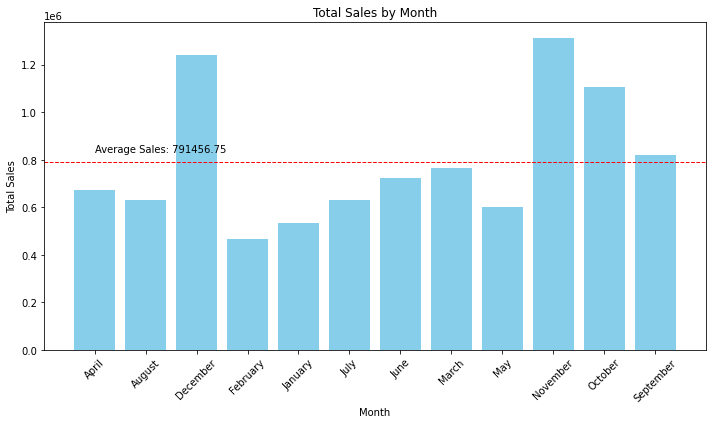

In [36]:
plt.figure(figsize=(10, 6))
plt.bar(sales_by_month['month'].astype(str), sales_by_month['Sales'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Sales by Month')
plt.xticks(rotation=45)
plt.axhline(y=average_sales, color='red', linestyle='--', linewidth=1)
plt.text(x=0, y=average_sales + 0.05 * average_sales, s=f'Average Sales: {average_sales:.2f}', color='black')
plt.tight_layout()
plt.show()

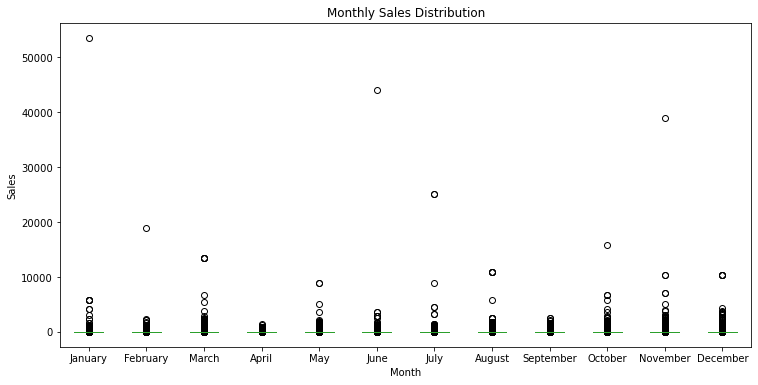

In [37]:
fig, ax = plt.subplots(figsize=(12, 6))
data.boxplot(column='Sales', by='month', grid=False, ax=ax)
plt.xticks(ticks=range(1, 13), labels=[calendar.month_name[i] for i in range(1, 13)])
plt.title('Monthly Sales Distribution')
plt.suptitle('')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

In [38]:
daily_sales = data.groupby('Date')['Sales'].sum()

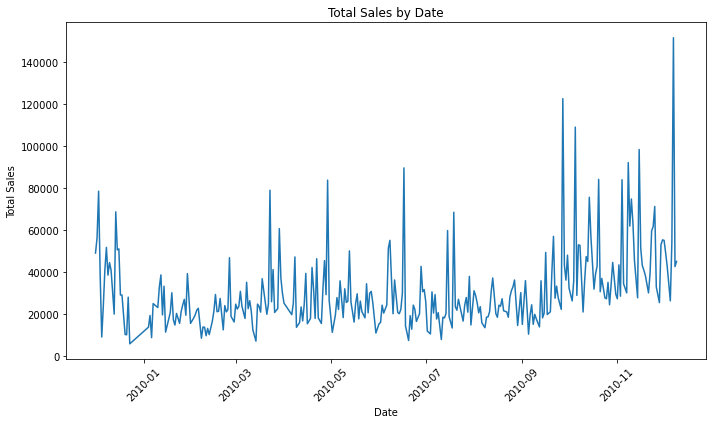

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(daily_sales.index, daily_sales.values)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales by Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Time-series Analysis

In [40]:
dx = data.groupby("Date")["Sales"].sum().reset_index()

In [41]:
dx.head(20)

,Date,Sales
0,2009-12-01,48969.55
1,2009-12-02,56238.96
2,2009-12-03,78431.92
3,2009-12-04,38405.57
4,2009-12-05,9042.36
5,2009-12-06,23500.39
6,2009-12-07,40807.44
7,2009-12-08,51666.84
8,2009-12-09,38468.69
9,2009-12-10,44437.11


### ARIMA

In [94]:
dx['Date'] = pd.to_datetime(dx['Date'])
dx = dx.sort_values('Date')

In [95]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima

In [96]:
train = dx.iloc[:-30]
test = dx.iloc[-30:]

In [97]:
result = adfuller(train['Sales'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -2.9431353131999094
p-value: 0.0405569865775913


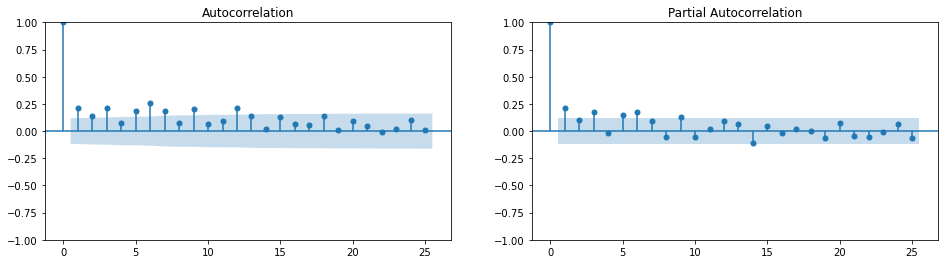

In [98]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
plot_acf(train['Sales'], ax=axes[0])
plot_pacf(train['Sales'], ax=axes[1])
plt.show()

In [99]:
auto_model = auto_arima(train['Sales'], seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6111.065, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6255.784, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6198.256, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6113.766, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6253.796, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6109.293, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=6112.673, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6115.322, Time=0.07 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=6110.711, Time=0.16 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=6114.100, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6115.311, Time=0.09 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=6108.327, Time=0.53 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=6108.829, Time=0.48 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=6108.867, Time=0.75 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept

In [100]:
model = ARIMA(train['Sales'], order=(2,1,3))
model_fit = model.fit()

In [101]:
forecast = model_fit.forecast(steps=30)
forecast_index = test.index

In [102]:
mse = mean_squared_error(test['Sales'], forecast)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 750243368.5874628


In [103]:
rmse = np.sqrt(mean_squared_error(test['Sales'], forecast))
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 27390.57079703639


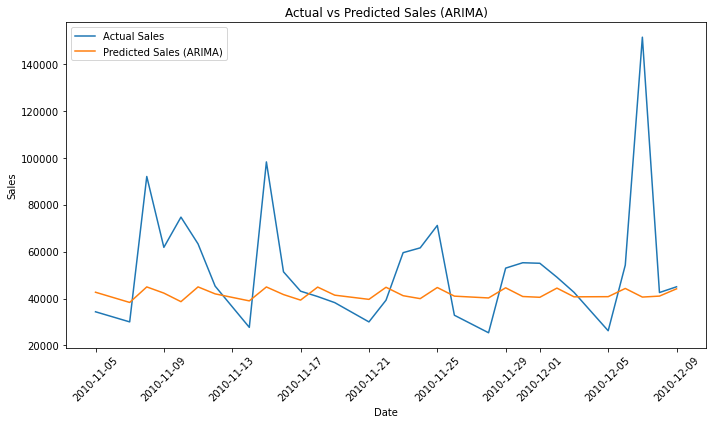

In [105]:
plt.figure(figsize=(10, 6))
plt.plot(test['Date'], test['Sales'], label='Actual Sales')
plt.plot(test['Date'], forecast, label='Predicted Sales (ARIMA)')
plt.title('Actual vs Predicted Sales (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Regression Analysis

In [53]:
data.head()

,Quantity,Price,Date,Time,Hour,Sales,year,quarter,month,day
0,12,6.95,2009-12-01,07:45:00,7,83.4,2009,4,December,1
1,12,6.75,2009-12-01,07:45:00,7,81.0,2009,4,December,1
2,12,6.75,2009-12-01,07:45:00,7,81.0,2009,4,December,1
3,48,2.10,2009-12-01,07:45:00,7,100.8,2009,4,December,1
4,24,1.25,2009-12-01,07:45:00,7,30.0,2009,4,December,1


In [54]:
df = data.copy()

In [55]:
df.head()

,Quantity,Price,Date,Time,Hour,Sales,year,quarter,month,day
0,12,6.95,2009-12-01,07:45:00,7,83.4,2009,4,December,1
1,12,6.75,2009-12-01,07:45:00,7,81.0,2009,4,December,1
2,12,6.75,2009-12-01,07:45:00,7,81.0,2009,4,December,1
3,48,2.10,2009-12-01,07:45:00,7,100.8,2009,4,December,1
4,24,1.25,2009-12-01,07:45:00,7,30.0,2009,4,December,1


In [56]:
df['Date'] = pd.to_datetime(df['Date'])

In [58]:
df['Datetime'] = df.apply(lambda row: pd.Timestamp.combine(row['Date'], row['Time']), axis=1)

In [60]:
daily_sales = df.groupby('Date').agg({'Sales': 'sum'}).reset_index()

In [61]:
max_date = daily_sales['Date'].max()
train_data = daily_sales[daily_sales['Date'] < (max_date - pd.Timedelta(days=30))]
test_data = daily_sales[daily_sales['Date'] >= (max_date - pd.Timedelta(days=30))]

In [62]:
train_data['dayofweek'] = train_data['Date'].dt.dayofweek
train_data['month'] = train_data['Date'].dt.month
train_data['day'] = train_data['Date'].dt.day

In [69]:
test_data['dayofweek'] = test_data['Date'].dt.dayofweek
test_data['month'] = test_data['Date'].dt.month
test_data['day'] = test_data['Date'].dt.day

In [70]:
train_data.head()

,Date,Sales,dayofweek,month,day
0,2009-12-01,48969.55,1,12,1
1,2009-12-02,56238.96,2,12,2
2,2009-12-03,78431.92,3,12,3
3,2009-12-04,38405.57,4,12,4
4,2009-12-05,9042.36,5,12,5


In [71]:
x_train = train_data[['dayofweek', 'month', 'day']]
y_train = train_data['Sales']

x_test = test_data[['dayofweek', 'month', 'day']]
y_test = test_data['Sales']

### Linear Regressor

In [81]:
from sklearn.linear_model import LinearRegression

In [83]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_train)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)

print(f'Train Mean Squared Error: {mse}')
print(f'Train Root Mean Squared Error: {rmse}')

Train Mean Squared Error: 223580765.03660288
Train Root Mean Squared Error: 14952.617330641579


In [84]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Test Mean Squared Error: {mse}')
print(f'Test Root Mean Squared Error: {rmse}')

Test Mean Squared Error: 786813324.902583
Test Root Mean Squared Error: 28050.19295660162


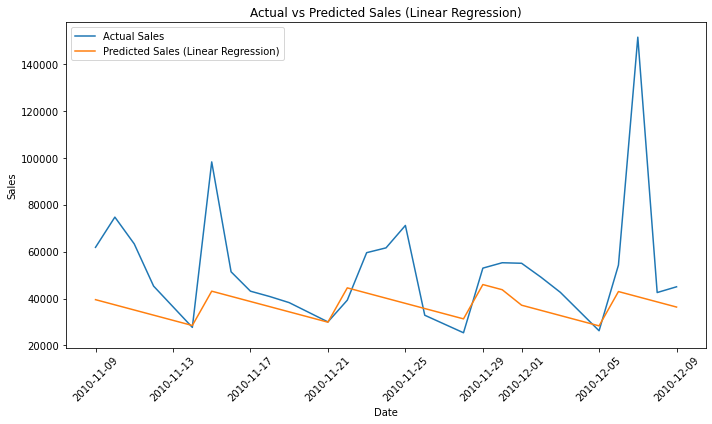

In [86]:
plt.figure(figsize=(10, 6))
plt.plot(test_data['Date'], y_test, label='Actual Sales')
plt.plot(test_data['Date'], y_pred, label='Predicted Sales (Linear Regression)')
plt.title('Actual vs Predicted Sales (Linear Regression)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Decision Tree Regressor

In [73]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [76]:
param_grid = {'max_depth': [5, 10, 15, 20, 25, 30, 50]}

dt = DecisionTreeRegressor(random_state=42)

grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5,
                              scoring='neg_mean_squared_error', n_jobs=-1,
                              verbose=1)

grid_search_dt.fit(x_train, y_train)
best_dt = grid_search_dt.best_estimator_
y_pred = best_dt.predict(x_train)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))

print("Best max_depth:", grid_search_dt.best_params_)
print(f'Train Root Mean Squared Error: {rmse}')
print(f'Train Mean Squared Error: {mse}')

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best max_depth: {'max_depth': 5}
Train Root Mean Squared Error: 11092.651926123708
Train Mean Squared Error: 123046926.75413601


In [89]:
dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Test Root Mean Squared Error: {rmse}')
print(f'Test Mean Squared Error: {mse}')

Test Root Mean Squared Error: 26176.916146235064
Test Mean Squared Error: 685230938.927022


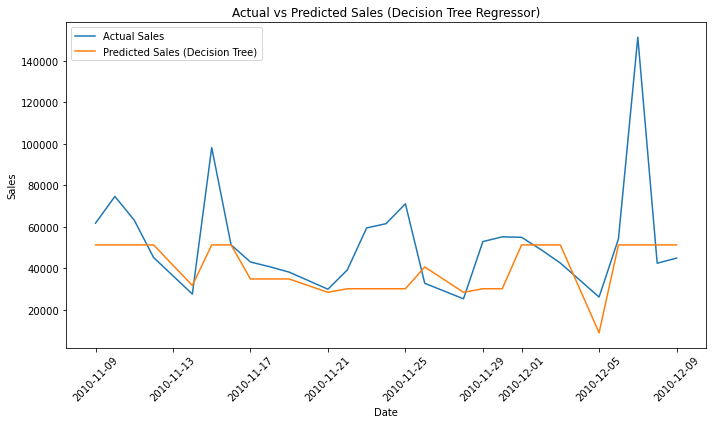

In [90]:
plt.figure(figsize=(10, 6))
plt.plot(test_data['Date'], y_test, label='Actual Sales')
plt.plot(test_data['Date'], y_pred, label='Predicted Sales (Decision Tree)')
plt.title('Actual vs Predicted Sales (Decision Tree Regressor)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Random Forest Regressor

In [87]:
from sklearn.ensemble import RandomForestRegressor

In [91]:
param_grid = {'n_estimators': [10, 50, 100, 150, 200]}

rf = RandomForestRegressor(random_state=42)

grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5,
                              scoring='neg_mean_squared_error', n_jobs=-1,
                              verbose=1)

grid_search_rf.fit(x_train, y_train)
best_rf = grid_search_rf.best_estimator_
y_pred = best_rf.predict(x_train)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))

print("Best max_depth:", grid_search_rf.best_params_)
print(f'Train Root Mean Squared Error: {rmse}')
print(f'Train Mean Squared Error: {mse}')

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best max_depth: {'n_estimators': 200}
Train Root Mean Squared Error: 5608.121087511601
Train Mean Squared Error: 31451022.132192306


In [92]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f'Test Root Mean Squared Error: {rmse}')
print(f'Test Mean Squared Error: {mse}')

Test Root Mean Squared Error: 24915.073161124164
Test Mean Squared Error: 620760870.6241697


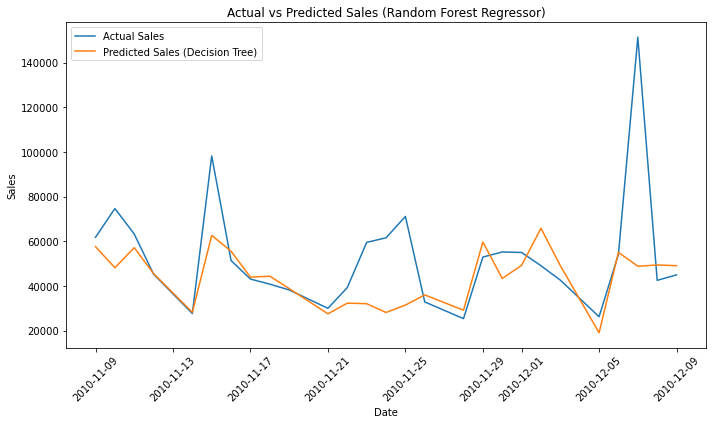

In [93]:
plt.figure(figsize=(10, 6))
plt.plot(test_data['Date'], y_test, label='Actual Sales')
plt.plot(test_data['Date'], y_pred, label='Predicted Sales (Decision Tree)')
plt.title('Actual vs Predicted Sales (Random Forest Regressor)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()